<h4>Problem Statement</h4>
Clustering: K-Means  
Dataset: Cities_r2.csv 
Apply Data pre-processing (Label Encoding , Data Transformation....) techniques 
if necessary. 
Apply K-Means clustering algorithms (based on total_graduates) to find the group 
of customers

In [85]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # Principal Component Analysis module used for dimensionality reduction


In [86]:
# Load the dataset
df = pd.read_csv('cities_r2.csv')
df.head(10) # Display first 10 rows of the dataset

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,...,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,134649,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932


In [87]:
# Select relevant features for clustering (total_graduates in this case)
X = df[['total_graduates']]# values converts it into a numpy array


In [88]:
print(X)

     total_graduates
0              16287
1               8863
2              10565
3              19225
4              11902
..               ...
488            30656
489           109613
490            19363
491            29803
492            13511

[493 rows x 1 columns]


In [89]:
df.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [90]:

# Data pre-processing - Standardize the data using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


In [91]:
# print(X_scaled)

In [92]:
# # Check the number of components obtained from PCA
# n_components = min(X_scaled.shape[1], 2)  # Limit components to the number of features
# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X_scaled)

In [93]:
# # Add PCA components to the dataframe if components are obtained
# if n_components > 0:
#     for i in range(n_components):
#         df[f'PCA{i+1}'] = X_pca[:, i]


In [2]:
from sklearn.cluster import KMeans
wcss = [] # Within Cluster Sum of Squares
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state = 42) # should be in same sequence
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  #THIS IS USED TO PLOT THE GRAPH
plt.plot(range(1,11), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("Wcss")
plt.title("The Elbow method")
plt.show()

NameError: name 'X' is not defined

In [95]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42) # random_state is the seed used by the random number generator
df['cluster'] = kmeans.fit_predict(X) # fit_predict() returns cluster labels

In [96]:

# Display the resulting clusters
print(df[['name_of_city', 'total_graduates', 'cluster']])

      name_of_city  total_graduates  cluster
0          Abohar             16287        0
1        Achalpur              8863        0
2        Adilabad             10565        0
3       Adityapur             19225        0
4           Adoni             11902        0
..             ...              ...      ...
488  Vizianagaram             30656        0
489      Warangal            109613        0
490        Wardha             19363        0
491   Yamunanagar             29803        0
492      Yavatmal             13511        0

[493 rows x 3 columns]


In [97]:
# pip install seaborn

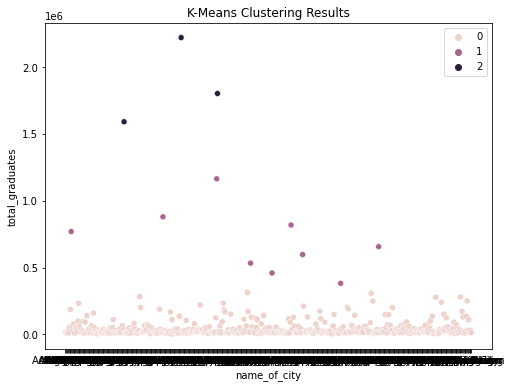

In [98]:
import seaborn as sns

# Scatter plot for K-Means clusters
plt.figure(figsize=(8, 6))

# If using PCA components for visualization
sns.scatterplot(x='name_of_city', y='total_graduates', hue='cluster', data=df )
plt.xlabel('name_of_city')
plt.ylabel('total_graduates')

        # sns.scatterplot(x='total_graduates', y='cluster', data=df, palette='viridis', legend='full')
        # plt.xlabel('Total Graduates')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()
#GIVE NAMES TO CLUSTERS IN FIGURE
